## Gigantyczne pliki

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns  

Najpierw sprawdzamy jakie tam są kolumny - jak przeczytać pierwsze 10 rekordów?

In [2]:
# kolorowe wydruki

def green(text):
     print('\033[32m', text, '\033[0m', sep='') 

def blue(text):
     print('\033[34m', text, '\033[0m', sep='')

def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  

def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')

def red(text):
     print('\033[31m', text, '\033[0m', sep='')  

def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  

In [3]:
giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'

df = pd.read_csv(giga_plik, nrows=1050)
print(df.shape)

df

(1050, 53)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,19574549,01/11/2011 03:47:18 PM,07/05/2011 04:08:01 PM,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19579718,01/11/2011 03:00:00 AM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011.0,226 WEST 20 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742622,-73.997968,"(40.74262244714865, -73.99796826857371)"
2,19573881,01/11/2011 11:31:02 AM,07/05/2011 04:07:58 PM,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19579917,01/11/2011 12:46:00 PM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Non-Residential) (L11),NaN,10128.0,7 EAST 95 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.787046,-73.955817,"(40.78704587425496, -73.95581736959971)"
4,19580080,01/11/2011 05:03:00 PM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,11208.0,721 FOUNTAIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662730,-73.868878,"(40.66272996328775, -73.8688777423775)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,19731323,01/31/2011 10:27:00 PM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10024.0,12 WEST 83 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.783601,-73.971397,"(40.783600664143115, -73.97139742555734)"
1046,19731324,01/31/2011 10:02:00 PM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,11223.0,156 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.596382,-73.978561,"(40.59638154797779, -73.97856050668693)"
1047,19740110,02/01/2011 05:33:00 AM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10009.0,285 AVENUE C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730104,-73.974599,"(40.73010358994871, -73.97459910777125)"
1048,19731315,01/31/2011 12:29:00 AM,NaN,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,11414.0,161-44 98 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.655722,-73.834195,"(40.65572168181417, -73.83419519746971)"


Analizujemy format danych

In [4]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Zużycie pamięci dla poszczegulnych zmiennych</span> 

In [5]:
print("Łączne zużycie pamięci: ",round((df.memory_usage(deep=True).sum())/1000000), 'MB')
df.memory_usage(deep=True)

Łączne zużycie pamięci:  3.0 MB


Index                                128
Unique Key                          8400
Created Date                       82950
Closed Date                        56348
Agency                             63680
Agency Name                        97892
Complaint Type                     69293
Descriptor                         88231
Location Type                      52641
Incident Zip                        8400
Incident Address                   72787
Street Name                        68585
Cross Street 1                     68019
Cross Street 2                     67969
Intersection Street 1              36734
Intersection Street 2              36671
Address Type                       66719
City                               66353
Landmark                           33636
Facility Type                      33744
Status                             65660
Due Date                           49251
Resolution Description            144193
Resolution Action Updated Date     59403
Community Board 

Najwięcej zajmuje format 'object', dlatego warto go przerobic na format 'category'.
Działamy teraz na małym wycinku bazy, chodzi o to aby ściągnąć bazę ale z odpowiednim formatem danych   
Określanie formatu kolumn podczas ściągania danych. 

'category' przechowuje każdą unikalną nazwę raz i używamy liczb całkowitych zajmujących mało miejsca, aby wiedzieć, która konkretna nazwa jest używana w każdym wierszu.

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Wyświetlamy tylko określony rodzaj danych</span>

In [6]:
df.describe(include = 'object').columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Taxi Pick Up Location', 'Location'],
      dtype='object')

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Definiuje kolumny do formatowania: 'category'

In [7]:
dtypes = { 
     'Agency':'category',
    'Agency Name':'category',
    'Complaint Type':'category',
    'Descriptor':'category',
    'Location Type':'category',
    'Incident Address':'category',
    'Street Name':'category',
    'Cross Street 1':'category',
    'Cross Street 2':'category',
    'Intersection Street 1':'category',
    'Intersection Street 2':'category',
    'Address Type':'category',
    'City':'category',
    'Landmark':'category',
    'Facility Type':'category',
    'Status':'category',
    'Due Date':'category',
    'Resolution Description':'category',
    'Resolution Action Updated Date':'category',
    'Community Board':'category',
    'Borough':'category',
    'Park Facility Name':'category',
    'Park Borough':'category',
    'School Name':'category',
    'School Number':'category',
    'School Region':'category',
    'School Code':'category',
    'School Phone Number':'category',
    'School Address':'category',
    'School City':'category',
    'School State':'category',
    'School Zip':'category',
    'School Not Found':'category',
    'Taxi Pick Up Location':'category',
    'Location':'category' }

In [8]:
giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'
parse_dates = ['Created Date','Closed Date'] ## określenie, które kolumny są datami

In [9]:
df2 = pd.read_csv(giga_plik, dtype = dtypes , parse_dates=parse_dates, nrows=1050)

In [10]:
df2.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                  category
Agency Name                             category
Complaint Type                          category
Descriptor                              category
Location Type                           category
Incident Zip                             float64
Incident Address                        category
Street Name                             category
Cross Street 1                          category
Cross Street 2                          category
Intersection Street 1                   category
Intersection Street 2                   category
Address Type                            category
City                                    category
Landmark                                category
Facility Type                           category
Status                                  category
Due Date            

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Zużycie pamięci dla poszczegulnych zmiennych</span> 

In [11]:
df2.memory_usage()

Index                               128
Unique Key                         8400
Created Date                       8400
Closed Date                        8400
Agency                             1458
Agency Name                        1874
Complaint Type                     2626
Descriptor                         4218
Location Type                      1826
Incident Zip                       8400
Incident Address                  50252
Street Name                       27868
Cross Street 1                    27540
Cross Street 2                    27524
Intersection Street 1              4226
Intersection Street 2              4234
Address Type                       1242
City                               4042
Landmark                           1058
Facility Type                      1058
Status                             1242
Due Date                          15004
Resolution Description             4018
Resolution Action Updated Date    26148
Community Board                    4146


In [12]:
print("Łączne zużycie pamięci: ",round((df2.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  1.0 MB


<span style="font-size: 150%;color:#073763;background:#cfe2f3"> Zmniejszyliśmy zużycie pamięci prawie o połowę. Teraz pytamy pandy jakie sa minimalne formaty dla liczb z bazy.  

In [13]:
df2.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [14]:
df2['Incident Zip'] = pd.to_numeric(df2['Incident Zip'], downcast='float')
df2['Incident Zip'].dtype

dtype('float32')

In [15]:
df.describe(include = 'float').columns

Index(['Incident Zip', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude',
       'Longitude'],
      dtype='object')

Zmieniam format na mniej wymagający float32 i dodaje do 'category'

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Teraz robimy razem ciągłwe i dyskretne

In [16]:
dtypes = { 
     'Agency':'category',
    'Agency Name':'category',
    'Complaint Type':'category',
    'Descriptor':'category',
    'Location Type':'category',
    'Incident Address':'category',
    'Street Name':'category',
    'Cross Street 1':'category',
    'Cross Street 2':'category',
    'Intersection Street 1':'category',
    'Intersection Street 2':'category',
    'Address Type':'category',
    'City':'category',
    'Landmark':'category',
    'Facility Type':'category',
    'Status':'category',
    'Due Date':'category',
    'Resolution Description':'category',
    'Resolution Action Updated Date':'category',
    'Community Board':'category',
    'Borough':'category',
    'Park Facility Name':'category',
    'Park Borough':'category',
    'School Name':'category',
    'School Number':'category',
    'School Region':'category',
    'School Code':'category',
    'School Phone Number':'category',
    'School Address':'category',
    'School City':'category',
    'School State':'category',
    'School Zip':'category',
    'School Not Found':'category',
    'Taxi Pick Up Location':'category',
    'Location':'category',
    
    'Incident Zip': 'category',
'X Coordinate (State Plane)': 'float32',
'Y Coordinate (State Plane)': 'float32',
'School or Citywide Complaint': 'category',
'Vehicle Type': 'category',
'Taxi Company Borough': 'category',
'Bridge Highway Name': 'category',
'Bridge Highway Direction': 'category',
'Road Ramp': 'category',
'Bridge Highway Segment':'category',
'Garage Lot Name': 'category',
'Ferry Direction': 'category',
'Ferry Terminal Name': 'category',
'Latitude': 'float32',
'Longitude': 'float32' }

giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'
parse_dates = ['Created Date','Closed Date']

df3 = pd.read_csv(giga_plik, dtype = dtypes , parse_dates=parse_dates, nrows=1050)

In [17]:
df3.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                  category
Agency Name                             category
Complaint Type                          category
Descriptor                              category
Location Type                           category
Incident Zip                            category
Incident Address                        category
Street Name                             category
Cross Street 1                          category
Cross Street 2                          category
Intersection Street 1                   category
Intersection Street 2                   category
Address Type                            category
City                                    category
Landmark                                category
Facility Type                           category
Status                                  category
Due Date            

In [18]:
print("Łączne zużycie pamięci: ",round((df3.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  1.0 MB


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Teraz otwieramy całą bazę

In [19]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu

giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'
parse_dates = ['Created Date','Closed Date']

df3 = pd.read_csv(giga_plik, dtype = dtypes , parse_dates=parse_dates)

print('minutes: ',
(time.time() - start_time)/60) ## koniec pomiaru czasu


minutes:  4.767305266857147


In [20]:
df3.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)"
2,19573881,2011-01-11 11:31:02,2011-07-05 16:07:58,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19579917,2011-01-11 12:46:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Non-Residential) (L11),NaN,10128,7 EAST 95 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.787045,-73.955818,"(40.78704587425496, -73.95581736959971)"
4,19580080,2011-01-11 17:03:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,11208,721 FOUNTAIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662731,-73.868881,"(40.66272996328775, -73.8688777423775)"


In [21]:
print("Łączne zużycie pamięci: ",round((df3.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  471.0 MB


<span style="font-size: 150%;color:#073763;background:#cfe2f3"> Teraz sprawdzamy czy data 'Created Date' jest kompletna

In [22]:
df3['Created Date'].isnull().sum()

0

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Jest kompletna więc dajemy go jako index

In [23]:
df3.reset_index 
df3.set_index('Created Date', inplace=True)

In [24]:
df3.head(2)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2011-01-11 15:47:18,19574549,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11 03:00:00,19579718,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,WEST 20 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)"


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Ustawienie samych ilości zdarzeń w ciągu miesiąca

In [25]:
df3.index.value_counts().resample('M', how='sum') # miesięcznie

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2011-01-31    174855
2011-02-28    161680
2011-03-31    173415
2011-04-30    146149
2011-05-31    147202
2011-06-30    151124
2011-07-31    152742
2011-08-31    163466
2011-09-30    159469
2011-10-31    168268
2011-11-30    159574
2011-12-31    159268
Freq: M, Name: Created Date, dtype: int64

# <span style="font-size: 150%;color:#073763;background:#cfe2f3">Tworzenie tabel przestawnych
<span style="font-size: 150%;color:#073763;background:#cfe2f3">Ściągamy giga plik jako DataFrame

In [26]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu

giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'
parse_dates = ['Created Date','Closed Date']

df = pd.read_csv(giga_plik, dtype = dtypes , parse_dates=parse_dates)

print('minutes: ',(time.time() - start_time)/60) ## koniec pomiaru czasu

minutes:  7.606520569324493


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Ustawiam nowy index

In [27]:
df.reset_index 
df.set_index('Unique Key', inplace=True)

In [28]:
df.head(2)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,WEST 20 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)"


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Wyciąganie danych z daty

In [29]:
df['Year'] = df['Created Date'].dt.year
df['Month'] = df['Created Date'].dt.month
df['Weekday Name'] = df['Created Date'].dt.weekday_name
df['hour'] = df['Created Date'].dt.hour

In [30]:
print("Łączne zużycie pamięci: ",round((df.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  640.0 MB


In [31]:
df = df.drop_duplicates()

In [32]:
print("Łączne zużycie pamięci: ",round((df.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  615.0 MB


In [33]:
df.head(2)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,hour
Unique Key,,,,,,,,,,,,,,,,,,,,,
19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2011,1,Tuesday,15
19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,WEST 20 STREET,...,NaN,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)",2011,1,Tuesday,3


In [34]:
df.hour.dtypes

dtype('int64')

In [35]:
df.hour.astype('int16')

Unique Key
19574549    15
19579718     3
19573881    11
19579917    12
19580080    17
            ..
26826563     5
26826565    10
26826567    23
26826576    16
26826579    13
Name: hour, Length: 1795980, dtype: int16

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Wyświetlenie struktury godzin

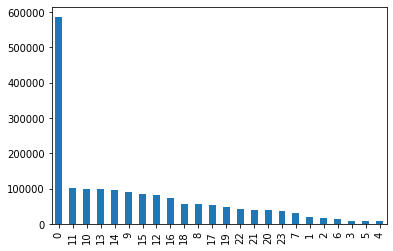

In [36]:
df['hour'].value_counts().plot(kind='bar')

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Tworzenie okresów w ciągu dnia

In [37]:
df['hour'].value_counts()

0     586435
11    100959
10     99847
13     98599
14     95081
9      89459
15     84817
12     83479
16     72720
18     56390
8      56263
17     53585
19     48727
22     41663
21     39398
20     39246
23     35904
7      31252
1      20690
2      17863
6      14969
3       9817
5       9468
4       9349
Name: hour, dtype: int64

In [38]:
df['hour'] = df['hour'].apply(lambda x: np.nan if x < 0 else 0)

In [42]:
df.head(2)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,hour
Unique Key,,,,,,,,,,,,,,,,,,,,,
19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2011,1,Tuesday,0
19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,WEST 20 STREET,...,NaN,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)",2011,1,Tuesday,0


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Ile jest agencji?

In [43]:
df.Agency.value_counts()

HPD       539848
DOT       300054
NYPD      278868
DEP       159743
DSNY      133000
DPR        85660
DOB        85158
DOF        66473
DOHMH      44898
DHS        30608
TLC        22731
DCA        21512
DFTA       11671
3-1-1       8130
DOE         2994
FDNY        2149
EDC         1279
DOITT       1148
NYCEM         36
COIB           7
OCHIA          2
HRA            1
WF1            1
CWI            1
NYCPPF         1
OATH           1
OPS            1
DCP            1
DV             1
CAU            1
SBS            1
ACS            1
Name: Agency, dtype: int64

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Agencje mniejsze równe 50 zrobić jako pozostałe

In [55]:
KAT = df.Agency.value_counts().reset_index()
KAT

,index,Agency
0,HPD,539848
1,DOT,300054
2,NYPD,278868
3,DEP,159743
4,DSNY,133000
5,DPR,85660
6,DOB,85158
7,DOF,66473
8,DOHMH,44898
9,DHS,30608


In [61]:
KAT['Agency_mine'] = KAT['Agency'].apply(lambda x: 'other' if x < 50 else x)
KAT

,index,Agency,Agency_mine
0,HPD,539848,539848
1,DOT,300054,300054
2,NYPD,278868,278868
3,DEP,159743,159743
4,DSNY,133000,133000
5,DPR,85660,85660
6,DOB,85158,85158
7,DOF,66473,66473
8,DOHMH,44898,44898
9,DHS,30608,30608


In [71]:
foka = KAT[KAT['Agency_mine']=='other'][['index']]
lista = foka['index'].tolist()
lista

['NYCEM',
 'COIB',
 'OCHIA',
 'HRA',
 'WF1',
 'CWI',
 'NYCPPF',
 'OATH',
 'OPS',
 'DCP',
 'DV',
 'CAU',
 'SBS',
 'ACS']